### Project: Analyzing Customer Purchases and Categorizing Spending Behavior

In [8]:
#install.packages("dplyr")
#install.packages("ggplot2")

also installing the dependencies 'fansi', 'pkgconfig', 'withr', 'generics', 'tibble', 'tidyselect'




package 'fansi' successfully unpacked and MD5 sums checked
package 'pkgconfig' successfully unpacked and MD5 sums checked
package 'withr' successfully unpacked and MD5 sums checked
package 'generics' successfully unpacked and MD5 sums checked
package 'tibble' successfully unpacked and MD5 sums checked
package 'tidyselect' successfully unpacked and MD5 sums checked
package 'dplyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Administrator\AppData\Local\Temp\RtmpYBYxNt\downloaded_packages


also installing the dependencies 'colorspace', 'farver', 'labeling', 'munsell', 'RColorBrewer', 'viridisLite', 'gtable', 'isoband', 'scales'




package 'colorspace' successfully unpacked and MD5 sums checked
package 'farver' successfully unpacked and MD5 sums checked
package 'labeling' successfully unpacked and MD5 sums checked
package 'munsell' successfully unpacked and MD5 sums checked
package 'RColorBrewer' successfully unpacked and MD5 sums checked
package 'viridisLite' successfully unpacked and MD5 sums checked
package 'gtable' successfully unpacked and MD5 sums checked
package 'isoband' successfully unpacked and MD5 sums checked
package 'scales' successfully unpacked and MD5 sums checked
package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Administrator\AppData\Local\Temp\RtmpYBYxNt\downloaded_packages


In [9]:
library(dplyr)
library(ggplot2)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [10]:
# Step 1: Generate synthetic customer purchase data
set.seed(123)  # Ensure reproducibility
customers <- paste("Customer", 1:20)  # 20 customers
purchases <- sample(50:500, 20, replace = TRUE)  # Random purchase amounts
customer_data <- data.frame(Customer = customers, PurchaseAmount = purchases)

In [11]:
# Step 2: Categorize customers based on spending behavior using loops & conditions
customer_category <- c()  # Empty vector to store categories

for (i in 1:nrow(customer_data)) {
  amount <- customer_data$PurchaseAmount[i]
  
  if (amount < 150) {
    category <- "Low Spender"
  } else if (amount < 350) {
    category <- "Moderate Spender"
  } else {
    category <- "High Spender"
  }
  
  customer_category <- c(customer_category, category)  # Append category
}

# Add the new category column to the data frame
customer_data$Category <- customer_category

In [12]:
# Step 3: Display summary statistics
summary_stats <- customer_data %>%
  group_by(Category) %>%
  summarise(
    Count = n(),
    Avg_Spending = mean(PurchaseAmount),
    Max_Spending = max(PurchaseAmount),
    Min_Spending = min(PurchaseAmount)
  )

print(summary_stats)

# A tibble: 3 × 5
  Category         Count Avg_Spending Max_Spending Min_Spending
  <chr>            <int>        <dbl>        <int>        <int>
1 High Spender         6         434           490          355
2 Low Spender          5         109           140           63
3 Moderate Spender     9         257.          348          167


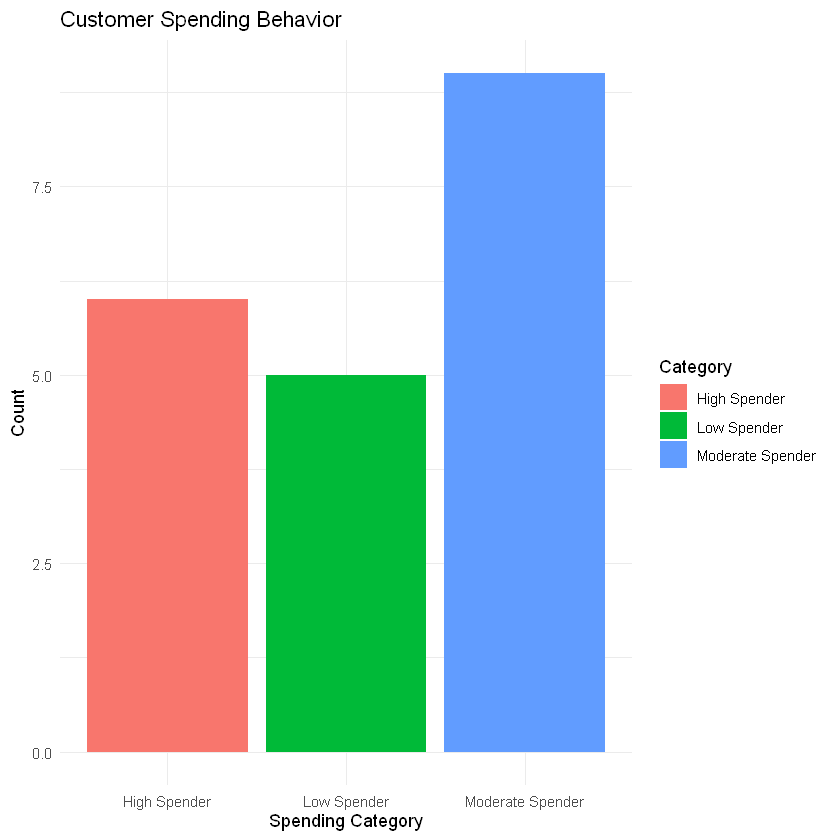

In [13]:
# Step 4: Visualize the spending behavior using a bar plot
ggplot(customer_data, aes(x = Category, fill = Category)) +
  geom_bar() +
  labs(title = "Customer Spending Behavior", x = "Spending Category", y = "Count") +
  theme_minimal()
